# Data Exploration



In [351]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

import warnings
warnings.simplefilter("ignore")

In [352]:
df = pd.read_csv('CarPrice_Assignment.csv')

In [353]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

There are no null values. Note that there are 10 categorical columns in our feature list.

In [354]:
df.duplicated().any()

False

There are no duplicate row in the data.

In [355]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [356]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [357]:
df.describe(include= "object")

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


Note that some categorical fields have more than 2 unique values which means we may need to use dummy variables in the model. Also note that, the car name column has 147 unique values which can be reduced if we consider the car brand names only instead of car brand with model names.

In [358]:
df.CarName.iloc[0].split()
df.CarName.iloc[0].split()[0]

'alfa-romero'

In [359]:
df["car_brand"] = df['CarName'].apply(lambda x: x.split()[0])
df["car_brand"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [360]:
df["car_brand"].replace("alfa-romero","alfa-romeo", inplace=True)
df["car_brand"].replace("maxda","mazda", inplace=True)
df["car_brand"].replace("Nissan","nissan", inplace=True)
df["car_brand"].replace("porcshce","porsche", inplace=True)
df["car_brand"].replace("toyouta","toyota", inplace=True)
df["car_brand"].replace("porcshce","porsche", inplace=True)
df["car_brand"].replace("vokswagen","volkswagen", inplace=True)
df["car_brand"].replace("vw","volkswagen", inplace=True)

In [361]:
df.drop(["CarName", "car_ID"], axis=1, inplace=True)
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_brand
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romeo
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romeo
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romeo
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


#Data Visualization

In [362]:
AveragePrice_Fuelsystem = df.groupby("fuelsystem").agg({"price": "mean"}).values.ravel()

AveragePrice_CarBody = df.groupby("carbody").agg({"price": "mean"}).values.ravel()

AveragePrice_Aspiration = df.groupby("aspiration").agg({"price": "mean"}).values.ravel()

AveragePrice_Drivewheel = df.groupby("drivewheel").agg({"price": "mean"}).values.ravel()

AveragePrice_Cylindernumber = df.groupby("cylindernumber").agg({"price": "mean"}).values.ravel()

AveragePrice_Enginelocation = df.groupby("enginelocation").agg({"price": "mean"}).values.ravel()

AveragePrice_Doornumber = df.groupby("doornumber").agg({"price": "mean"}).values.ravel()

In [363]:
AveragePrice_Doornumber

array([13501.15217391, 12989.92407778])

In [364]:
range(len(df['doornumber'].value_counts()))

range(0, 2)

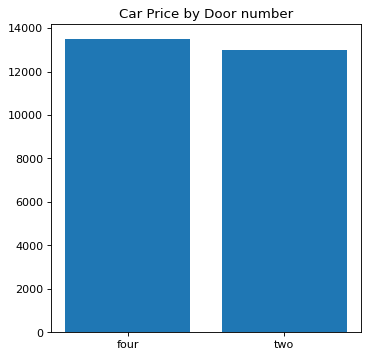

In [365]:
plt.figure(figsize = (5, 5), dpi = 80)
plt.bar(range(len(df['doornumber'].value_counts())), AveragePrice_Doornumber)
plt.title("Car Price by Door number")
plt.xticks(range(len((df['doornumber'].value_counts()))) , df['doornumber'].value_counts().index)
plt.show()

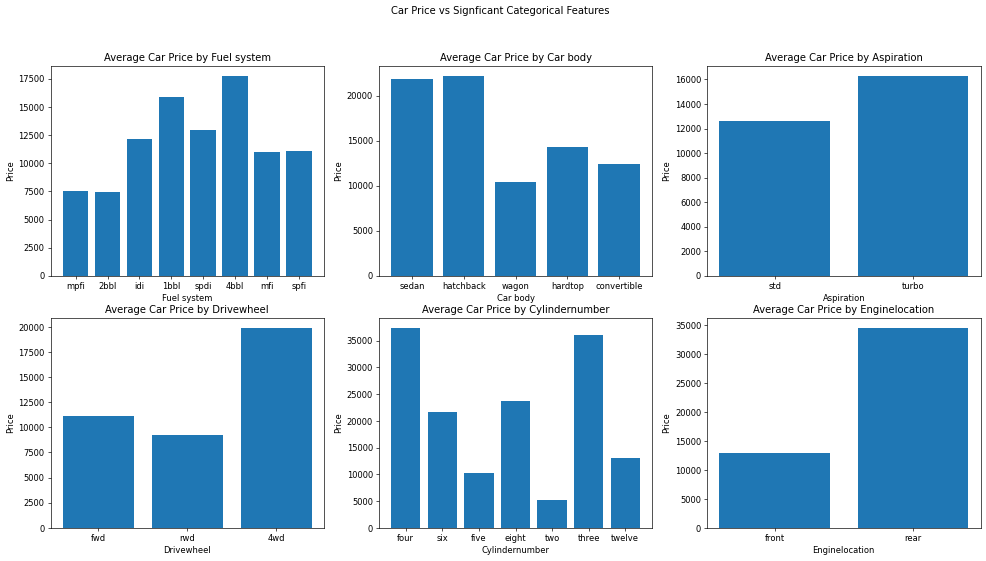

In [366]:
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (20,10), dpi = 60)
fig.suptitle("Car Price vs Signficant Categorical Features")

axs[0,0].set_title("Average Car Price by Fuel system")
axs[0,0].set_xlabel("Fuel system")
axs[0,0].set_ylabel("Price")
axs[0,0].bar(range(len(df['fuelsystem'].value_counts())), AveragePrice_Fuelsystem)
axs[0,0].set_xticks(range(len((df['fuelsystem'].value_counts()))) , df['fuelsystem'].value_counts().index)

axs[0,1].set_title("Average Car Price by Car body")
axs[0,1].set_xlabel("Car body")
axs[0,1].set_ylabel("Price")
axs[0,1].bar(range(len(df['carbody'].value_counts())), AveragePrice_CarBody)
axs[0,1].set_xticks(range(len((df['carbody'].value_counts()))) , df['carbody'].value_counts().index)

axs[0,2].set_title("Average Car Price by Aspiration")
axs[0,2].set_xlabel("Aspiration")
axs[0,2].set_ylabel("Price")
axs[0,2].bar(range(len(df['aspiration'].value_counts())), AveragePrice_Aspiration)
axs[0,2].set_xticks(range(len((df['aspiration'].value_counts()))) , df['aspiration'].value_counts().index)

axs[1,0].set_title("Average Car Price by Drivewheel")
axs[1,0].set_xlabel("Drivewheel")
axs[1,0].set_ylabel("Price")
axs[1,0].bar(range(len(df['drivewheel'].value_counts())), AveragePrice_Drivewheel)
axs[1,0].set_xticks(range(len((df['drivewheel'].value_counts()))) , df['drivewheel'].value_counts().index)

axs[1,1].set_title("Average Car Price by Cylindernumber")
axs[1,1].set_xlabel("Cylindernumber")
axs[1,1].set_ylabel("Price")
axs[1,1].bar(range(len(df['cylindernumber'].value_counts())), AveragePrice_Cylindernumber)
axs[1,1].set_xticks(range(len((df['cylindernumber'].value_counts()))) , df['cylindernumber'].value_counts().index)

axs[1,2].set_title("Average Car Price by Enginelocation")
axs[1,2].set_xlabel("Enginelocation")
axs[1,2].set_ylabel("Price")
axs[1,2].bar(range(len(df['enginelocation'].value_counts())), AveragePrice_Enginelocation)
axs[1,2].set_xticks(range(len((df['enginelocation'].value_counts()))) , df['enginelocation'].value_counts().index)

plt.show()

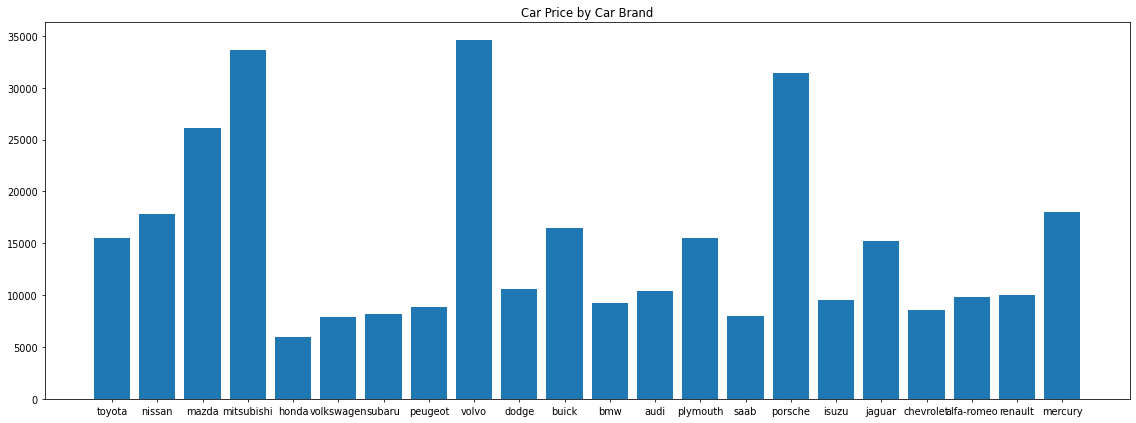

In [367]:
AveragePrice_Carbrand = df.groupby("car_brand").agg({"price": "mean"}).values.ravel()

plt.figure(figsize = (20, 7), dpi = 70)
plt.bar(range(len(df['car_brand'].value_counts())), AveragePrice_Carbrand)
plt.title("Car Price by Car Brand")
plt.xticks(range(len((df['car_brand'].value_counts()))) , df['car_brand'].value_counts().index)
plt.show()

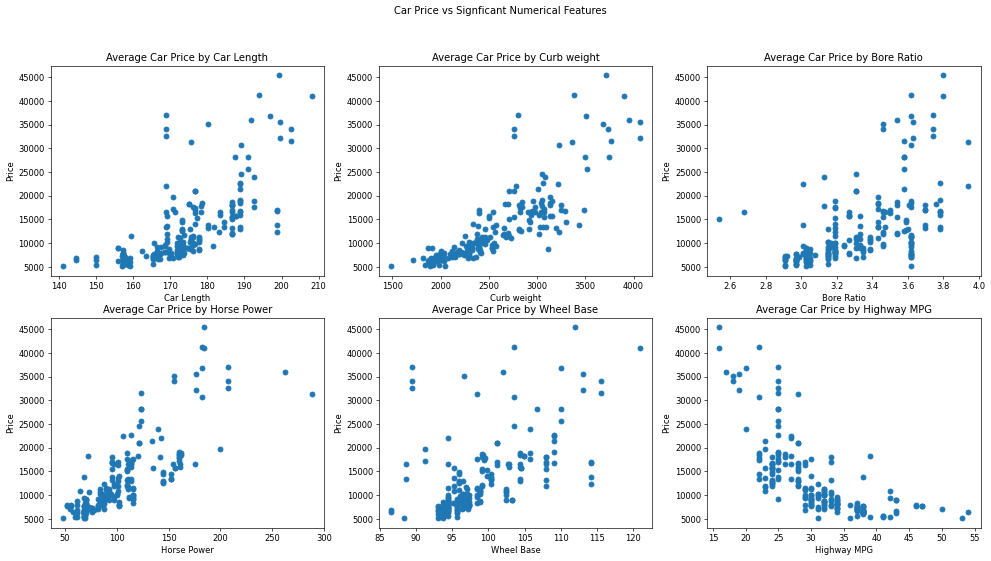

In [369]:
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (20,10), dpi = 60)
fig.suptitle("Car Price vs Signficant Numerical Features")

axs[0,0].set_title("Average Car Price by Car Length")
axs[0,0].set_xlabel("Car Length")
axs[0,0].set_ylabel("Price")
axs[0,0].scatter(df['carlength'], df['price'])

axs[0,1].set_title("Average Car Price by Curb weight")
axs[0,1].set_xlabel("Curb weight")
axs[0,1].set_ylabel("Price")
axs[0,1].scatter(df['curbweight'],  df['price'])

axs[0,2].set_title("Average Car Price by Bore Ratio")
axs[0,2].set_xlabel("Bore Ratio")
axs[0,2].set_ylabel("Price")
axs[0,2].scatter(df['boreratio'],  df['price'])

axs[1,0].set_title("Average Car Price by Horse Power")
axs[1,0].set_xlabel("Horse Power")
axs[1,0].set_ylabel("Price")
axs[1,0].scatter(df['horsepower'],  df['price'])

axs[1,1].set_title("Average Car Price by Wheel Base")
axs[1,1].set_xlabel("Wheel Base")
axs[1,1].set_ylabel("Price")
axs[1,1].scatter(df['wheelbase'],  df['price'])

axs[1,2].set_title("Average Car Price by Highway MPG")
axs[1,2].set_xlabel("Highway MPG")
axs[1,2].set_ylabel("Price")
axs[1,2].scatter(df['highwaympg'],  df['price'])


plt.show()

#Feature Selection

In [370]:
numerical_cols = df.select_dtypes(exclude = 'object').columns
numerical_cols

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [371]:
categorical_cols = df.select_dtypes(include = 'object').columns
categorical_cols

Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem',
       'car_brand'],
      dtype='object')

In [372]:
df[numerical_cols]

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


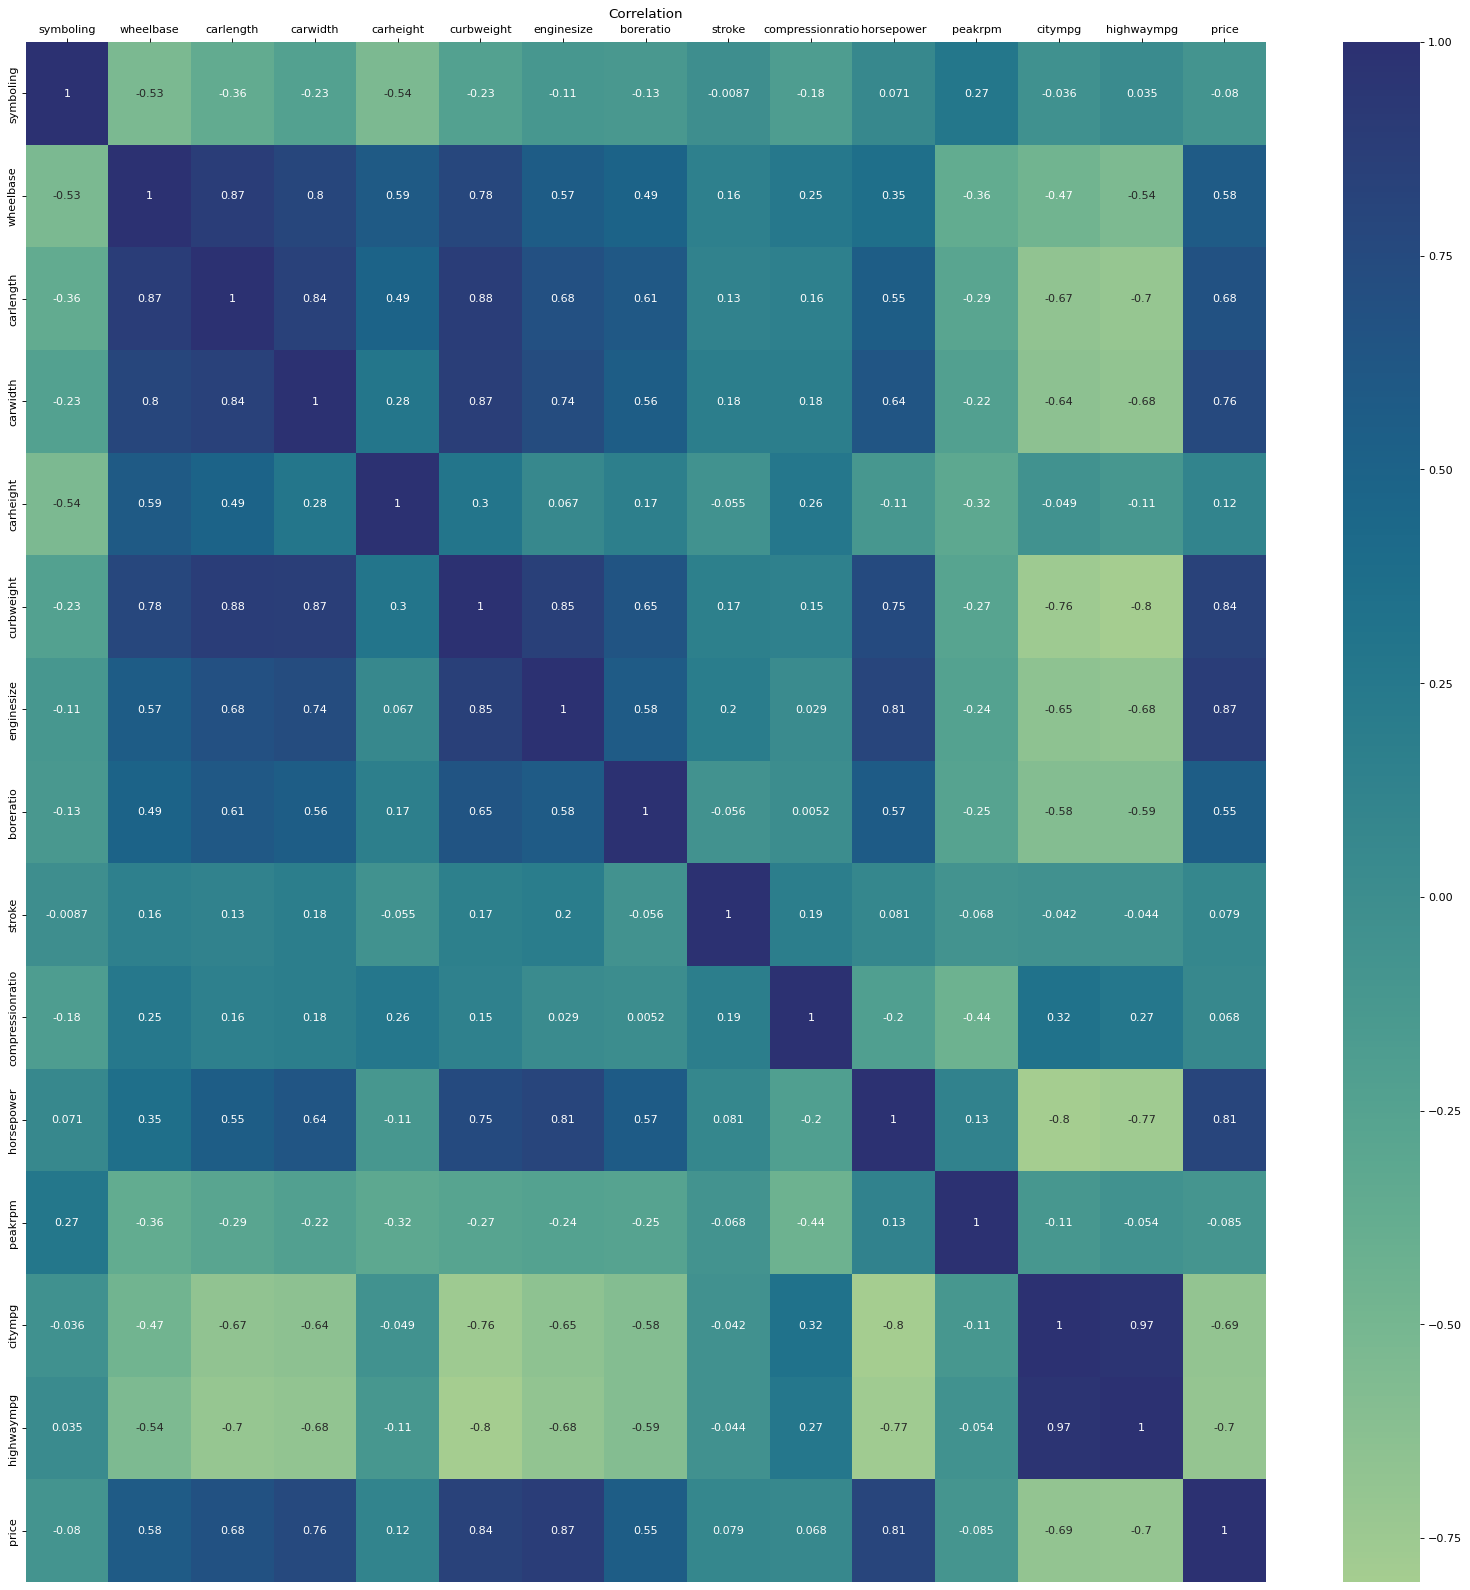

In [373]:
#Heatmap
plt.figure(figsize = (25, 25), dpi = 80)
plt.title("Correlation")
ax= sns.heatmap(df[numerical_cols].corr() , annot = True, cmap = "crest")
ax.xaxis.tick_top()
plt.show()

In [374]:
df.drop(['stroke', 'symboling', 'compressionratio', 'peakrpm', 'boreratio', 'carheight', 'symboling' ], axis= 1, inplace=True)

In [375]:
numerical_cols1 = df.select_dtypes(exclude = 'object').columns
numerical_cols1

Index(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'horsepower', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [376]:
feature_numerical = df[numerical_cols1].drop('price', axis=1)
feature_numerical

,wheelbase,carlength,carwidth,curbweight,enginesize,horsepower,citympg,highwaympg
0,88.6,168.8,64.1,2548,130,111,21,27
1,88.6,168.8,64.1,2548,130,111,21,27
2,94.5,171.2,65.5,2823,152,154,19,26
3,99.8,176.6,66.2,2337,109,102,24,30
4,99.4,176.6,66.4,2824,136,115,18,22
...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,2952,141,114,23,28
201,109.1,188.8,68.8,3049,141,160,19,25
202,109.1,188.8,68.9,3012,173,134,18,23
203,109.1,188.8,68.9,3217,145,106,26,27


In [377]:
def calculated_vif(dataset):
    vif = pd.DataFrame()
    vif["features"] = dataset.columns
    vif["VIF"] = [variance_inflation_factor(dataset.values, i) for i in range(dataset.shape[1])]
    return(vif)

In [378]:
calculated_vif(feature_numerical)

,features,VIF
0,wheelbase,1744.640791
1,carlength,1713.027432
2,carwidth,1588.679878
3,curbweight,272.463643
4,enginesize,54.989201
5,horsepower,49.819691
6,citympg,401.890892
7,highwaympg,497.052158


In [379]:
feature_numerical.corr()

,wheelbase,carlength,carwidth,curbweight,enginesize,horsepower,citympg,highwaympg
wheelbase,1.000000,0.874587,0.795144,0.776386,0.569329,0.353294,-0.470414,-0.544082
carlength,0.874587,1.000000,0.841118,0.877728,0.683360,0.552623,-0.670909,-0.704662
carwidth,0.795144,0.841118,1.000000,0.867032,0.735433,0.640732,-0.642704,-0.677218
curbweight,0.776386,0.877728,0.867032,1.000000,0.850594,0.750739,-0.757414,-0.797465
enginesize,0.569329,0.683360,0.735433,0.850594,1.000000,0.809769,-0.653658,-0.677470
horsepower,0.353294,0.552623,0.640732,0.750739,0.809769,1.000000,-0.801456,-0.770544
citympg,-0.470414,-0.670909,-0.642704,-0.757414,-0.653658,-0.801456,1.000000,0.971337
highwaympg,-0.544082,-0.704662,-0.677218,-0.797465,-0.677470,-0.770544,0.971337,1.000000


In [380]:
df.drop(['citympg', 'enginesize','wheelbase', 'carwidth', 'curbweight' ], axis= 1, inplace=True)

In [381]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fueltype        205 non-null    object 
 1   aspiration      205 non-null    object 
 2   doornumber      205 non-null    object 
 3   carbody         205 non-null    object 
 4   drivewheel      205 non-null    object 
 5   enginelocation  205 non-null    object 
 6   carlength       205 non-null    float64
 7   enginetype      205 non-null    object 
 8   cylindernumber  205 non-null    object 
 9   fuelsystem      205 non-null    object 
 10  horsepower      205 non-null    int64  
 11  highwaympg      205 non-null    int64  
 12  price           205 non-null    float64
 13  car_brand       205 non-null    object 
dtypes: float64(2), int64(2), object(10)
memory usage: 22.5+ KB


In [382]:
df[categorical_cols]

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,car_brand
0,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romeo
1,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romeo
2,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romeo
3,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi
4,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi
...,...,...,...,...,...,...,...,...,...,...
200,gas,std,four,sedan,rwd,front,ohc,four,mpfi,volvo
201,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi,volvo
202,gas,std,four,sedan,rwd,front,ohcv,six,mpfi,volvo
203,diesel,turbo,four,sedan,rwd,front,ohc,six,idi,volvo


In [383]:
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
categorical_cols_encoded = df[categorical_cols].apply(label_encoder.fit_transform)

# Apply ANOVA
f_scores, p_values = f_classif(categorical_cols_encoded, df["price"])

# Create a dataframe to store results
anova_results = pd.DataFrame({'Feature': categorical_cols_encoded.columns, 'F-Score': f_scores, 'P-Value': p_values})

# Sort dataframe by F-Score in descending order
anova_results = anova_results.sort_values(by='P-Value', ascending=False)

# Print or further analyze the results
print(anova_results)

          Feature    F-Score       P-Value
6      enginetype   1.202588  3.512988e-01
0        fueltype   1.450960  1.973502e-01
2      doornumber   2.063311  4.760354e-02
9       car_brand   2.072742  4.661179e-02
3         carbody   3.118215  5.629728e-03
1      aspiration   5.076077  2.833995e-04
4      drivewheel   5.285314  2.174129e-04
8      fuelsystem   5.327723  2.062502e-04
7  cylindernumber  21.904722  7.388765e-09
5  enginelocation        inf  0.000000e+00


In [384]:
anova_results[anova_results['P-Value'] < 0.05]['Feature'].tolist()

['doornumber',
 'car_brand',
 'carbody',
 'aspiration',
 'drivewheel',
 'fuelsystem',
 'cylindernumber',
 'enginelocation']

In [385]:
df.drop(['fueltype', 'enginetype' ], axis= 1, inplace=True)

In [386]:
df

,aspiration,doornumber,carbody,drivewheel,enginelocation,carlength,cylindernumber,fuelsystem,horsepower,highwaympg,price,car_brand
0,std,two,convertible,rwd,front,168.8,four,mpfi,111,27,13495.0,alfa-romeo
1,std,two,convertible,rwd,front,168.8,four,mpfi,111,27,16500.0,alfa-romeo
2,std,two,hatchback,rwd,front,171.2,six,mpfi,154,26,16500.0,alfa-romeo
3,std,four,sedan,fwd,front,176.6,four,mpfi,102,30,13950.0,audi
4,std,four,sedan,4wd,front,176.6,five,mpfi,115,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...
200,std,four,sedan,rwd,front,188.8,four,mpfi,114,28,16845.0,volvo
201,turbo,four,sedan,rwd,front,188.8,four,mpfi,160,25,19045.0,volvo
202,std,four,sedan,rwd,front,188.8,six,mpfi,134,23,21485.0,volvo
203,turbo,four,sedan,rwd,front,188.8,six,idi,106,27,22470.0,volvo


#Dummy Variables

In [387]:
categorical_cols1 = df.select_dtypes(include = "object").columns

for col in categorical_cols1:
    encoded_adtopic = pd.get_dummies(df[col], drop_first = True)
    df = df.drop(columns = [col])
    df = pd.concat([df, encoded_adtopic], axis = 1)

In [388]:
df

,carlength,horsepower,highwaympg,price,turbo,two,hardtop,hatchback,sedan,wagon,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,168.8,111,27,13495.0,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,168.8,111,27,16500.0,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,171.2,154,26,16500.0,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,176.6,102,30,13950.0,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,176.6,115,22,17450.0,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,188.8,114,28,16845.0,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
201,188.8,160,25,19045.0,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
202,188.8,134,23,21485.0,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
203,188.8,106,27,22470.0,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True


#Train-Test split and models

In [389]:
X = df.drop('price', axis=1)
y = df['price']

In [390]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [391]:
X_train

,carlength,horsepower,highwaympg,turbo,two,hardtop,hatchback,sedan,wagon,fwd,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
177,175.6,92,32,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,True,False,False
75,178.4,175,24,True,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
174,175.6,73,33,True,False,False,False,True,False,True,...,False,False,False,False,False,False,False,True,False,False
31,144.6,76,38,False,True,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
12,176.8,121,28,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,178.5,160,25,False,True,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
14,189.0,121,25,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
92,165.3,69,37,False,False,False,False,True,False,True,...,True,False,False,False,False,False,False,False,False,False
179,183.5,161,24,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [392]:
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [393]:
y_pred_train= lr.predict(X_train)
y_pred_train

array([10430.24355191, 16503.        , 10844.22186425,  5397.7133888 ,
       22708.40239938,  7795.18769345, 20668.84259201, 11221.39719088,
        7217.17701848, 18815.16721868,  7097.9634002 ,  6487.69328939,
       14496.57006134,  9254.46437783, 12068.60280912, 12409.10309353,
        5480.65836467,  8449.04175175,  5658.19308084, 18081.89900551,
       16763.46214041, 17275.45613268, 16474.76512004,  5480.65836467,
       11048.        ,  7031.5463985 , 33278.        ,  8344.46858979,
        5066.97158323,  5907.25376171, 16771.85857113, 10467.29590991,
        6391.46129401, 13953.22185421, 11904.85666874,  6303.54842198,
       18571.4127685 , 19951.86839947,  6509.48926929, 18761.91099101,
        8468.74000545, 33278.        , 16763.46214041,  7538.00711597,
       18102.46569718,  5424.23874542, 14604.1761398 , 10484.3042324 ,
       13420.40943975,  8718.05977752, 18465.62852959,  9734.02769674,
        6097.51299845,  6253.51782848, 15181.77765022, 15010.11743998,
      

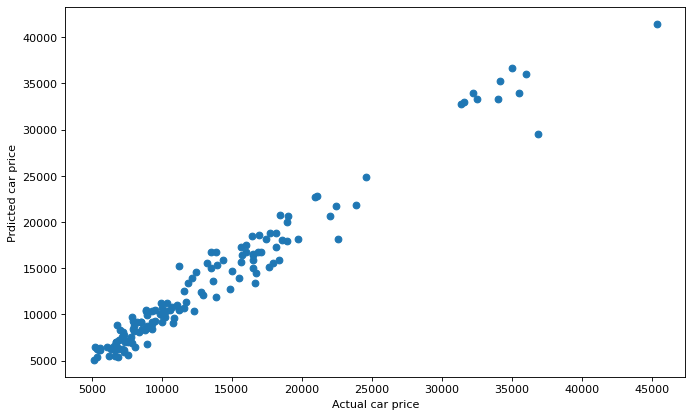

In [394]:
plt.figure(figsize = (10, 6), dpi = 80)
plt.scatter(y_train, y_pred_train)
plt.xlabel("Actual car price")
plt.ylabel("Prdicted car price")
plt.show()

In [395]:
r2_score(y_train, y_pred_train)

0.9637543508615496

In [396]:
print(mean_absolute_error(y_train,  y_pred_train))
print(mean_squared_error(y_train, y_pred_train))
print(mean_absolute_percentage_error(y_train, y_pred_train))

1093.769536063377
2209158.4390510432
0.0885501367154188


In [397]:
y_pred_test= lr.predict(X_test)
y_pred_test

array([28135.67985624, 22956.44119846,  9094.48918929, 14686.49006738,
       30164.61896751,  7019.25400918,  7758.25367682,  7224.09991181,
        7239.30769641,  8074.5309138 , 12266.87638565,  7348.54172137,
        9844.90877987, 10430.24355191, 37692.56649064,  6361.6096985 ,
        6315.27893403, 12792.6428628 ,  8344.46858979,  7829.83859553,
        9734.02769674, 16258.52456509, 10957.05752549,  4392.33658491,
        5658.19308084, 28826.87740287, 15181.77765022, 15921.56680219,
        6207.86466894, 16763.46214041, 31006.51430573,  6210.22013069,
        8258.75064243, 21015.46653463,  7825.26422463, 35644.3784608 ,
       11923.14943904, 13645.        ,  6947.25494024, 12792.6428628 ,
        6956.70674129,  8078.35753685, 13312.80336129,  6509.38613118,
        6236.17443441,  9749.54920519,  6497.24553292,  5459.75976769,
       15569.63082221, 13353.1322113 ,  6826.7583844 , 17524.11741515,
        5825.49150844,  9586.57583761,  6207.86466894, 16099.14352348,
      

In [398]:
r2_score(y_test, y_pred_test)

0.8431024480718902

In [399]:
print(mean_absolute_error(y_test,  y_pred_test))
print(mean_squared_error(y_test, y_pred_test))
print(mean_absolute_percentage_error(y_test, y_pred_test))

2148.5016457562274
10870549.390969714
0.1592041440248526


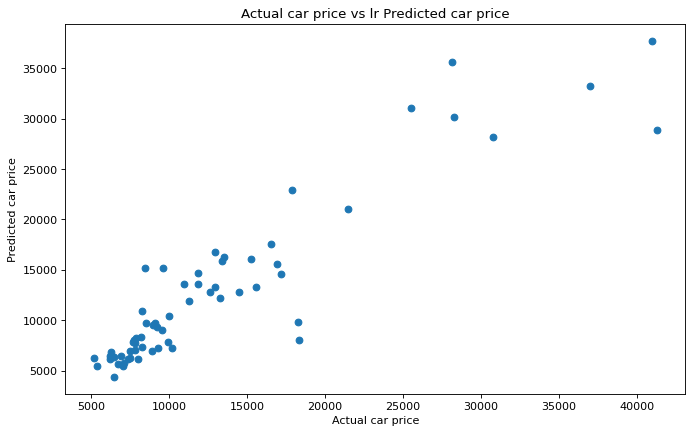

In [400]:
plt.figure(figsize = (10, 6), dpi = 80)
plt.scatter(y_test, y_pred_test)
plt.title("Actual car price vs lr Predicted car price")
plt.xlabel("Actual car price")
plt.ylabel("Predicted car price")
plt.show()

In [401]:
dtr = DecisionTreeRegressor()
lasso = Lasso()

In [402]:
dtr.fit(X_train, y_train)
lasso.fit(X_train, y_train)

Lasso()

In [403]:
dtr_predicted_Y = dtr.predict(X_test)
lasso_predicted_Y = lasso.predict(X_test)

In [404]:
dtr_mae = mean_absolute_error(y_test, dtr_predicted_Y)
dtr_rmse = np.sqrt(mean_squared_error(y_test, dtr_predicted_Y))
dtr_mape = mean_absolute_percentage_error(y_test, dtr_predicted_Y)

print(dtr_mae)
print(dtr_rmse)
print(dtr_mape)

1955.008059139785
3294.641959953304
0.1337733556400921


In [405]:
Lasso_mae = mean_absolute_error(y_test, lasso_predicted_Y)
Lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_predicted_Y))
Lasso_mape = mean_absolute_percentage_error(y_test, lasso_predicted_Y)

print(Lasso_mae)
print(Lasso_rmse)
print(Lasso_mape)

2157.61595725173
3286.2792639203117
0.160519619211302


Therefore, Decision Tree Regressor provides better prediction.

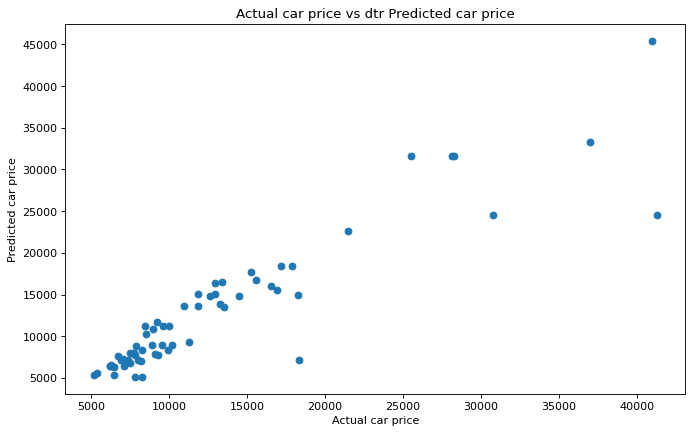

In [406]:
plt.figure(figsize = (10, 6), dpi = 80)
plt.scatter(y_test, dtr_predicted_Y )
plt.title("Actual car price vs dtr Predicted car price")
plt.xlabel("Actual car price")
plt.ylabel("Predicted car price")
plt.show()

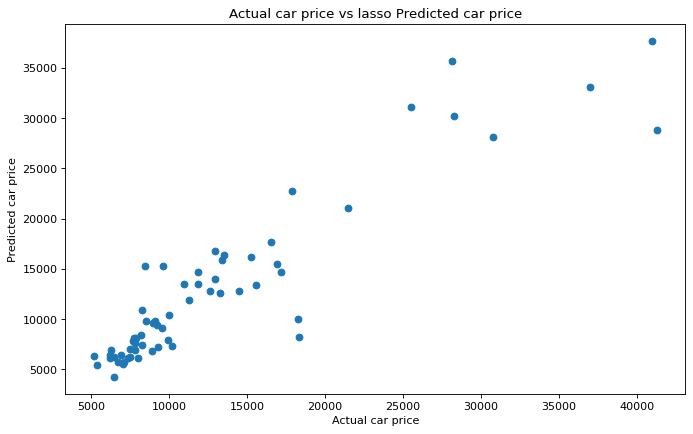

In [407]:
plt.figure(figsize = (10, 6), dpi = 80)
plt.scatter(y_test, lasso_predicted_Y )
plt.title("Actual car price vs lasso Predicted car price")
plt.xlabel("Actual car price")
plt.ylabel("Predicted car price")
plt.show()

These scatter plots confirm our conclusion - we can use the dtr model to predict the car prices with more precision.